Instituto Federal de Santa Catarina
Disciplina: Sistemas de Controle II
Aluna: Jade Dutra Lopes

In [99]:
import numpy as np
import sympy as sp
import control                   
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg
from numpy.linalg import matrix_rank, eig

In [100]:
A = np.matrix('0 1; -3 -2')
B = np.matrix('0;1')
C = np.matrix('1, 0')
D = np.matrix('0')

#sistema de estados
G = control.ss(A,B,C,D)
G

StateSpace(array([[ 0.,  1.],
       [-3., -2.]]), array([[0.],
       [1.]]), array([[1., 0.]]), array([[0.]]))

In [101]:
s1 = -2
s2 = -3
s3 = -10

In [102]:
# Matriz de Controlabilidade
Mc = np.block([[A, B],[-C, 0]]);

# teste de controlabilidade    = n+1?
np.linalg.matrix_rank(Mc)

3

In [103]:
# Equação característica desejada
eq_des = np.poly([s1, s2, s3]);
eq_des

array([ 1., 15., 56., 60.])

In [104]:
# Matrizes Expandidas
A_c = np.block([[A, np.zeros([2,1])],[-C, 0]]);
B_c = np.block([[B],[0]]);
print(A_chapeu)

[[ 0.  1.  0.]
 [-3. -2.  0.]
 [-1.  0.  0.]]


In [105]:
# Matriz de ganhos do controlador K_chapeu = [k1 k2 -ki]
K_chapeu = control.acker(A_chapeu,B_chapeu,[s1, s2, s3])
K_chapeu

matrix([[ 53.,  13., -60.]])

In [106]:
 # Verificando
autovalores, autovetores = linalg.eig(A_chapeu-B_chapeu*K_chapeu);
autovalores

array([-10.+0.j,  -3.+0.j,  -2.+0.j])

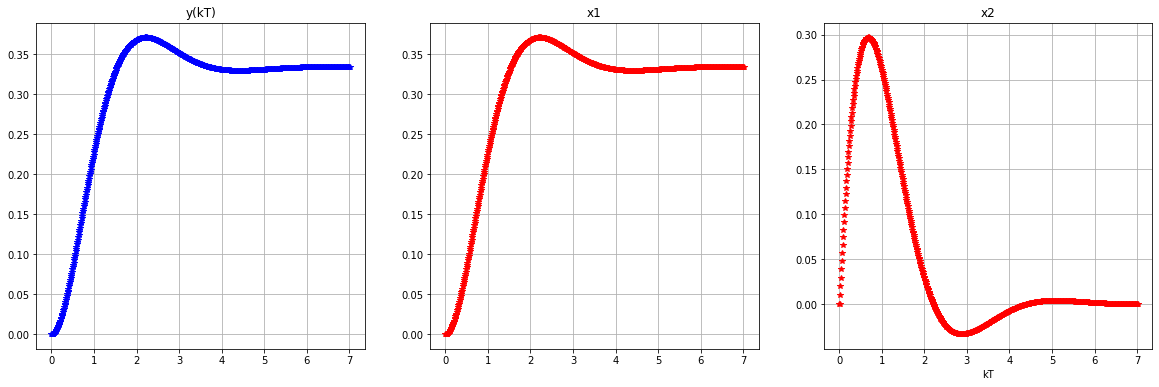

In [107]:
tfinal = 7
T = 0.01
kmax = int(tfinal/T + 1)
k = np.linspace(0, kmax, kmax+1)
u = np.array([1.0]*len(k))       #degrau
 
x = np.matrix([np.zeros_like(k), np.zeros_like(k)])
x_p = np.zeros_like(x)

y = np.zeros_like(k)

for i in range (1, len(k)):
    x[:, i] = T*x_p[:, i-1] + x[:, i-1]
    
    x_p[:, i] = A*x[:, i] + B*u[i]
    y[i] = C*x[:, i] + D*u[i]
       
f, [Y, X1, X2] = plt.subplots(1, 3, figsize= [20, 6])

X1.plot(k*T, np.transpose(x[0, :]),'r*')
X1.set_title("x1")
plt.xlabel("kT")
X1.grid()

X2.plot(k*T, np.transpose(x[1, :]), 'r*')
X2.set_title("x2")
plt.xlabel("kT")
X2.grid()


Y.plot(k*T, y, 'b*');
Y.set_title("y(kT)")
plt.xlabel("kT")
Y.grid()

plt.show()

In [115]:
t = np.linspace(0, tfinal, 1000) 

print(f'É controlável? {matrix_rank(A)} + 1 = {matrix_rank(Mc)}')

K_c = control.acker(A_c, B_c, [s1, s2, s3])
auVa, auVe = eig(A_c-B_c*K_c)

print(f'Autovalores = {auVa}')

K = np.matrix([K_c[0, 0], K_c[0 ,1]])
Ki = np.matrix([-K_c[0, 2]])
print(f'K^ = {K_c}\nK = {K}\nKi = {Ki}')

AA = np.block([[A-B*K, B+Ki], [-C, 0]])
BB = np.matrix([[0], [0], [1]])
CC = np.matrix([1, 0, 0])
DD = np.matrix([0])

FTMF = control.ss(AA, BB, CC, DD)
Y, t, X = control.matlab.lsim(FTMF, [1]*len(t), t, np.matrix('[0;0;0]'))

print(AA)
print(BB)
print(CC)
print(DD)

É controlável? 2 + 1 = 3
Autovalores = [-10.  -3.  -2.]
K^ = [[ 53.  13. -60.]]
K = [[53. 13.]]
Ki = [[60.]]
[[  0.   1.  60.]
 [-56. -15.  61.]
 [ -1.   0.   0.]]
[[0]
 [0]
 [1]]
[[1 0 0]]
[[0]]


In [109]:
AA = np.block([[A-(B*K), B*Ki],[-C,0]])
BB = np.block([[0],[0],[1]])
CC = np.block([1, 0, 0])
DD = 0

In [110]:
ctr= control.ss(AA,BB,CC,DD) # Sistema Compensado

tfinal = 7;
Ts = 0.1
Kmax = int(tfinal/Ts+1)
t = np.linspace(0, tfinal,Kmax+1);
k = np.linspace(0, Kmax, Kmax+1)
# Resposta para entrada ao degrau
Yc, Tc = control.matlab.step(ctr,tfinal)

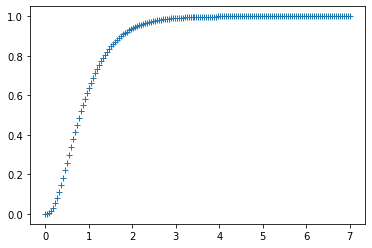

In [111]:
plt.figure()
plt.plot(Tc, Yc, '+') #sistema original vs compensado
plt.show()